# Kinetic Features - Details

Created: 09/12/2022 

Author: Andrew Weng

In [3]:
import os, sys

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')
    sys.path.insert(0, 'src/')

import pybamm

import yaml
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

from src.formation import FormationCell
import src.plotter as plotter

In [4]:
plotter.initialize(plt)

paths = yaml.load(open('paths.yaml', 'r'), Loader=yaml.FullLoader)
output_path = f"{paths['outputs']}/2022-08-25-manufacturing-features"

## Subplot: charge versus discharge resistance

## Subplot: impact of temperature on measured resistance

## Subplot: impact of current rate on measured resistance

## Subplot: SOC reporting error as a function of rest time, at mid, low, high SOC

## Subplot: Rs misestimation error as a function of logging frequency

In [5]:
cell = FormationCell(4)
hppc_data_chg = cell.process_diagnostic_hppc_charge_data()[0]
hppc_data_dch = cell.process_diagnostic_hppc_discharge_data()[0]
df_raw = hppc_data_chg['raw_all']

df_chg = hppc_data_chg['data']
df_dch = hppc_data_dch['data']

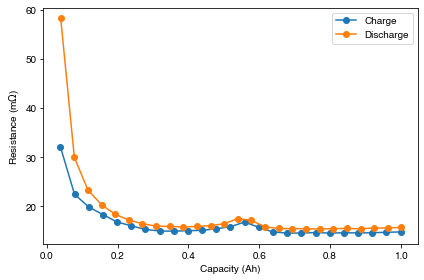

In [6]:
xc = df_chg['capacity']/np.max(df_chg['capacity'])
yc = df_chg['resistance_10s_ohm']*1000
xd = df_dch['capacity']/np.max(df_dch['capacity'])
yd = df_dch['resistance_10s_ohm']*1000

plt.figure()

plt.plot(xc, yc, marker='o', label='Charge')
plt.plot(xd, yd, marker='o', label='Discharge')
plt.legend()
plt.xlabel('Capacity (Ah)')
plt.ylabel(('Resistance (m$\Omega$)'))
plt.grid(False)


<ipython-input-7-8a8b1a5b9649>:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f'{output_path}/fig_kinetic_features.png',
/Users/aweng/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


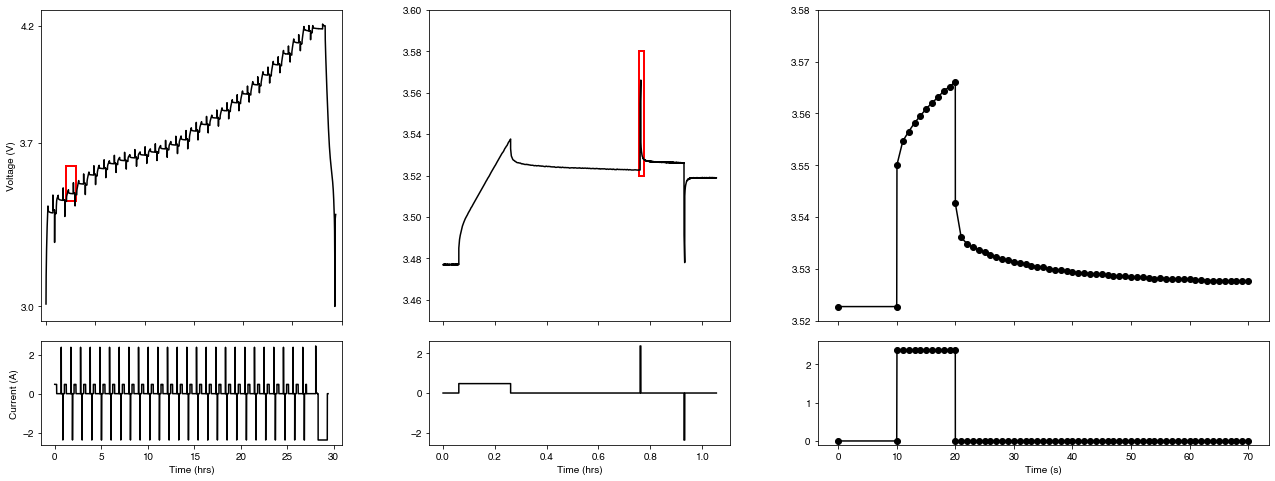

In [7]:

gridspec = dict(wspace=0.25, hspace=0.10, width_ratios=[2, 2, 3], height_ratios=[3, 1])

coords1 = [11000, 14800, 3.45, 3.60]
coords2 = [13720, 13800, 3.52, 3.58]

fig, axs = plt.subplots(nrows=2, ncols=3,
                            gridspec_kw=gridspec,
                            figsize=(22, 8))

x = (df_raw['Test Time (s)'] - df_raw['Test Time (s)'].iloc[0])/3600
y = df_raw['Potential (V)']
yy = df_raw['Current (A)']

ax1 = axs[0, 0]
ax2 = axs[0, 1]
ax3 = axs[0, 2]

ax4 = axs[1, 0]
ax5 = axs[1, 1]
ax6 = axs[1, 2]

ax1.plot(x, y, marker='', linestyle='-', color='k')
ax1.set_xticklabels([])
ax1.set_ylabel('Voltage (V)')
ax1.set_xlim((-0.5, 30))
ax1.set_yticks([3.0, 3.7, 4.2])
ax1.add_patch(Rectangle((coords1[0]/3600, coords1[2]),
                         (coords1[0] - coords1[1])/3600,
                         coords1[3] - coords1[2],
                         edgecolor='red',
                         facecolor='none',
                         lw=2))

ax4.plot(x, yy, marker='', linestyle='-', color='k')
ax4.set_ylabel('Current (A)')



x = df_raw['Test Time (s)'] - df_raw['Test Time (s)'].iloc[0]
y = df_raw['Potential (V)']
yy = df_raw['Current (A)']

idx = np.where((x > coords1[0]) & (x < coords1[1]))[0]

x = x.iloc[idx]/3600
y = y.iloc[idx]
yy = yy.iloc[idx]

ax2.plot(x - x.iloc[0], y, marker='', linestyle='-', color='k')
ax2.set_xticklabels([])
ax2.set_ylim((coords1[2], coords1[3]))
ax2.add_patch(Rectangle(((coords2[0] - coords1[0])/3600, coords2[2]),
                         (coords2[1] - coords2[0])/3600,
                         coords2[3] - coords2[2],
                         edgecolor='red',
                         facecolor='none',
                         lw=2))

ax5.plot(x - x.iloc[0], yy, color='k')


x = df_raw['Test Time (s)'] - df_raw['Test Time (s)'].iloc[0]
y = df_raw['Potential (V)']
yy = df_raw['Current (A)']

idx = np.where((x > coords2[0]) & (x < coords2[1]))[0]
x = x.iloc[idx]
y = y.iloc[idx]
yy = yy.iloc[idx]

ax3.plot(x - x.iloc[0], y, marker='o', linestyle='-', color='k')
ax3.set_xticklabels([])
ax3.set_ylim((coords2[2], coords2[3]))

ax6.plot(x - x.iloc[0], yy, color='k', marker='o', linestyle='-')


ax4.set_xlabel('Time (hrs)')
ax5.set_xlabel('Time (hrs)')
ax6.set_xlabel('Time (s)')
ax6.set_ylim((-0.1, 2.6))

for ax in axs.flatten():
    ax.grid(False)


plt.savefig(f'{output_path}/fig_kinetic_features.png', 
            dpi=300, bbox_inches='tight')

7195    13729.97
7196    13739.96
7197    13740.00
7198    13741.00
7199    13742.00
          ...   
7254    13795.97
7255    13796.97
7256    13797.97
7257    13798.97
7258    13799.97
Name: Test Time (s), Length: 64, dtype: float64

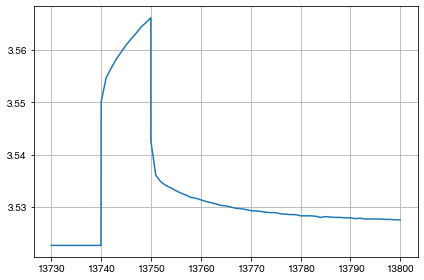

In [9]:
plt.figure()
plt.plot(x, y)